<a href="https://colab.research.google.com/github/divyansh1195/Natural-Language-Processing/blob/master/Restaurant%20Reviews/restaurant_reviews_stem_bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

data=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) 


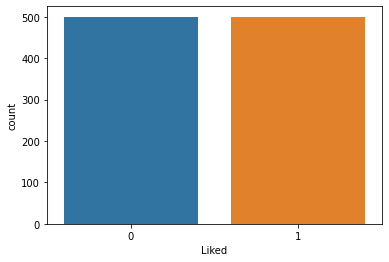

In [3]:
import seaborn as sns
sns.countplot(x='Liked', data=data)
plt.show()

In [4]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, good_reviews_count)

(500, 500)

Data cleaning

In [5]:

# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/allyson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/allyson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not 
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

count vectorization

In [7]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [8]:
import pickle

pickle.dump(cv, open('countvector.pkl', 'wb'))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Model training

In [10]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Logistic regression

In [11]:
#Logistic Regression
lr = LogisticRegression(random_state=0, C=0.82286, max_iter=2000, solver='lbfgs')
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)

[0.7761194  0.82089552 0.73134328 0.80597015 0.7761194  0.74626866
 0.8358209  0.88059701 0.78787879 0.77272727 0.90909091 0.77272727]
80.12965475652042
The accuracy of the Logistic Regression is 78.0
[[81 16]
 [28 75]]


Naives bayes

In [12]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print(cm)

[0.67164179 0.68656716 0.76119403 0.70149254 0.68656716 0.65671642
 0.73134328 0.7761194  0.63636364 0.65151515 0.78787879 0.72727273]
70.62226745062567
The accuracy of the Naive Bayes is 74.0
[[60 37]
 [15 88]]


In [19]:

filename = 'voting_clf.pkl'
pickle.dump(voting_clf, open(filename, 'wb'))

The model with the highest accuracy is the Logistic regression with 78%.  